<a href="https://colab.research.google.com/github/dudegrabow/var_model/blob/main/var_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv('/content/drive/MyDrive/DS/pibic/modelo certo.csv', encoding='utf-8')
df.head()

,obs,ANO,IND,INFLACAO,SELIC,CAMB,IND_d11,INFLACAO_d11,SELIC_d11,CAMB_d11
0,2002Q1,2002/T1,575.268892,38.153612,48.488200,468.233767,620.627201,37.638225,47.566373,464.918415
1,2002Q2,2002/T2,604.629716,39.281481,47.095984,496.854579,603.839693,39.519468,46.811582,507.988106
2,2002Q3,2002/T3,593.432672,41.960009,42.897989,615.812992,565.376990,42.260026,43.097839,617.075810
3,2002Q4,2002/T4,520.755417,47.565083,52.559563,688.762544,509.841089,47.520498,53.591319,677.406324
4,2003Q1,2003/T1,441.596880,50.544784,52.428753,629.068622,475.909432,50.074362,51.540908,625.170567


In [6]:
#checando os valores nulos
df.apply(lambda x: sum(x.isnull()), axis =0)

obs             0
ANO             0
IND             0
INFLACAO        0
SELIC           0
CAMB            0
IND_d11         0
INFLACAO_d11    0
SELIC_d11       0
CAMB_d11        0
dtype: int64

In [7]:
df.describe()

,IND,INFLACAO,SELIC,CAMB,IND_d11,INFLACAO_d11,SELIC_d11,CAMB_d11
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,410.947277,71.491621,21.560010,394.052897,411.290247,71.487383,21.544386,394.170916
std,78.045064,17.456034,12.582527,96.502723,77.350716,17.460868,12.543389,96.167738
min,266.100000,38.153612,8.024563,278.569024,260.892070,37.638225,8.059848,282.139858
25%,348.488190,58.918681,12.312205,323.962246,350.029464,58.738075,12.177104,328.397770
50%,418.616803,71.106946,16.696954,364.904024,417.916450,71.197469,16.889500,363.269504
75%,461.409676,84.683492,29.761383,443.242263,457.731922,84.719425,29.517637,445.720600
max,604.629716,104.240329,52.559563,688.762544,620.627201,104.182356,53.591319,677.406324


In [8]:
#checando os valores nulos
df.apply(lambda x: sum(x.isnull()), axis =0)

obs             0
ANO             0
IND             0
INFLACAO        0
SELIC           0
CAMB            0
IND_d11         0
INFLACAO_d11    0
SELIC_d11       0
CAMB_d11        0
dtype: int64

In [9]:
#tirando NA, se houver
df = df.dropna(axis=0)
df.describe

<bound method NDFrame.describe of        obs      ANO         IND    INFLACAO      SELIC        CAMB  \
0   2002Q1  2002/T1  575.268892   38.153612  48.488200  468.233767   
1   2002Q2  2002/T2  604.629716   39.281481  47.095984  496.854579   
2   2002Q3  2002/T3  593.432672   41.960009  42.897989  615.812992   
3   2002Q4  2002/T4  520.755417   47.565083  52.559563  688.762544   
4   2003Q1  2003/T1  441.596880   50.544784  52.428753  629.068622   
5   2003Q2  2003/T2  461.596739   50.368399  51.619668  532.550605   
6   2003Q3  2003/T3  488.044053   50.941547  39.260684  521.254057   
7   2003Q4  2003/T4  488.420997   51.699140  31.915425  523.508385   
8   2004Q1  2004/T1  447.594818   53.107363  30.598394  528.828354   
9   2004Q2  2004/T2  461.222613   55.205553  28.982592  544.262294   
10  2004Q3  2004/T3  481.192944   57.001693  28.507925  529.194413   
11  2004Q4  2004/T4  464.547852   58.120166  30.540174  506.878493   
12  2005Q1  2005/T1  415.798961   59.019312  32.616443  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


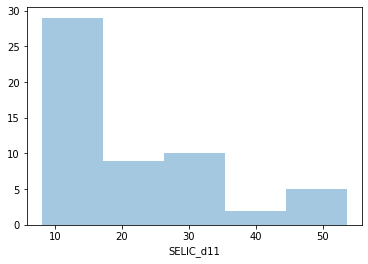

In [10]:
#como SELIC_d11 esta distribuído
sns.distplot(df.SELIC_d11,kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


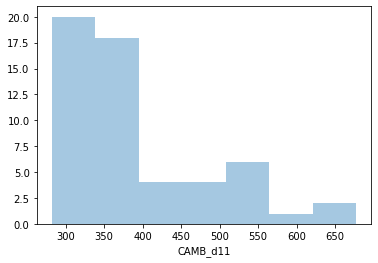

In [11]:
#como CAMB_d11 esta distribuído
sns.distplot(df.CAMB_d11,kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


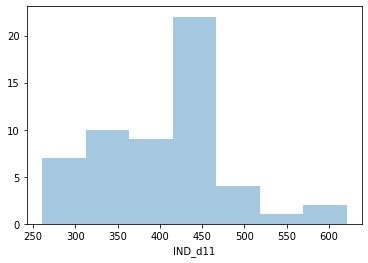

In [12]:
#como IND esta distribuído
sns.distplot(df.IND_d11,kde=False)

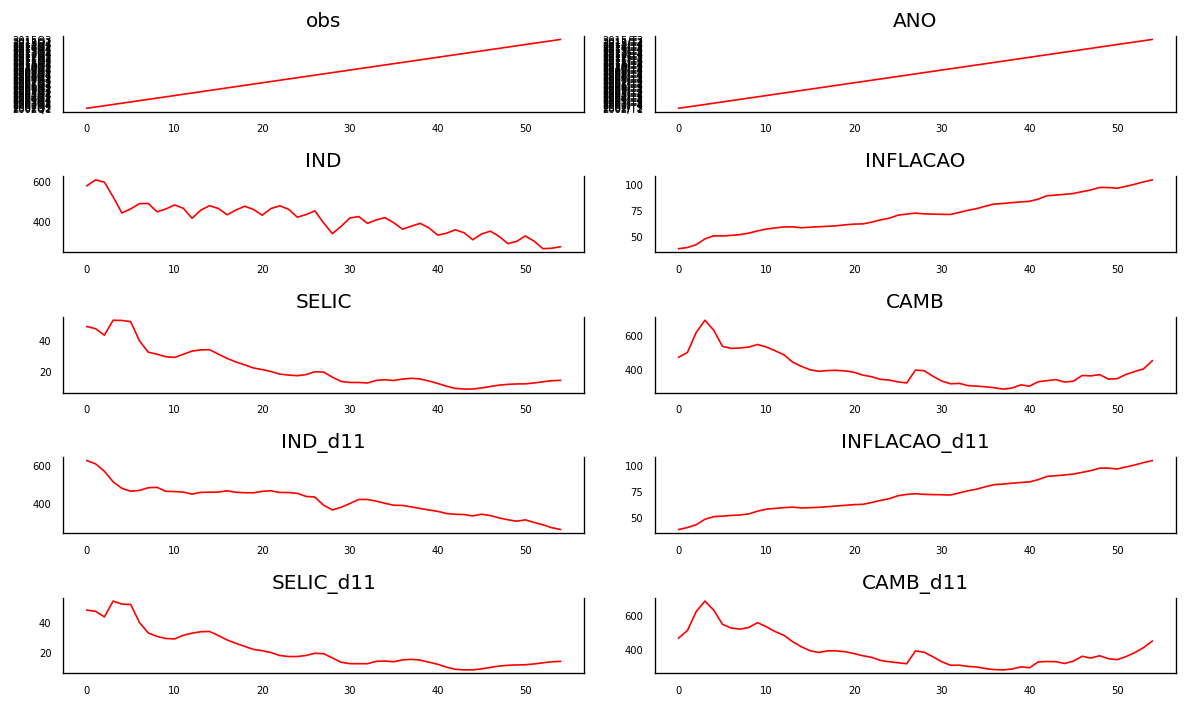

In [13]:
fig, axes = plt.subplots(nrows=5, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [144]:
df1 = df[['INFLACAO_d11', 'CAMB_d11', 'IND_d11', 'SELIC_d11']]

In [145]:
df1

,INFLACAO_d11,CAMB_d11,IND_d11,SELIC_d11
0,37.638225,464.918415,620.627201,47.566373
1,39.519468,507.988106,603.839693,46.811582
2,42.260026,617.075810,565.376990,43.097839
3,47.520498,677.406324,509.841089,53.591319
4,50.074362,625.170567,475.909432,51.540908
5,50.578095,543.438604,460.870534,51.347169
6,51.234489,522.201501,465.130758,39.361558
7,51.640616,515.983591,478.935968,32.481448
8,52.715410,525.964161,481.236315,30.214938
9,55.364808,553.395269,460.364139,28.820336


In [143]:
features = df[['INFLACAO_d11', 'CAMB_d11', 'SELIC_d11']]
features
y = df.IND_d11
print(features)

    INFLACAO_d11    CAMB_d11  SELIC_d11
0      37.638225  464.918415  47.566373
1      39.519468  507.988106  46.811582
2      42.260026  617.075810  43.097839
3      47.520498  677.406324  53.591319
4      50.074362  625.170567  51.540908
5      50.578095  543.438604  51.347169
6      51.234489  522.201501  39.361558
7      51.640616  515.983591  32.481448
8      52.715410  525.964161  30.214938
9      55.364808  553.395269  28.820336
10     57.261757  529.670931  28.530953
11     58.053069  501.995312  30.956208
12     58.740002  480.870066  32.370246
13     59.226044  443.891243  33.299799
14     58.465706  414.745816  33.439707
15     58.736147  391.503151  30.766097
16     59.058101  382.064348  27.826631
17     59.679994  391.656336  25.629563
18     60.344015  391.310057  23.580215
19     60.991641  386.669725  21.612830
20     61.674939  375.512748  20.758749
21     61.957661  363.324281  19.519685
22     63.740984  354.203608  17.555648
23     65.718980  336.721337  16.910478


In [146]:
y

0     620.627201
1     603.839693
2     565.376990
3     509.841089
4     475.909432
5     460.870534
6     465.130758
7     478.935968
8     481.236315
9     460.364139
10    459.080291
11    456.352732
12    445.733533
13    454.882224
14    455.685312
15    456.383554
16    463.105997
17    455.339542
18    453.039346
19    452.496654
20    460.509231
21    462.978954
22    454.428667
23    453.927183
24    449.979289
25    433.525263
26    430.388144
27    387.241923
28    363.221040
29    377.040153
30    396.695277
31    417.916450
32    417.669968
33    409.040454
34    397.590958
35    387.563252
36    386.638258
37    378.772292
38    370.556973
39    362.883216
40    355.659504
41    344.399425
42    340.200799
43    339.233951
44    331.870520
45    340.672159
46    333.639349
47    321.263653
48    311.773443
49    304.194580
50    311.238473
51    297.548997
52    285.374536
53    270.203886
54    260.892070
Name: IND_d11, dtype: float64

In [147]:
#Causalidade de Granger

In [148]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df1 = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df1.columns:
        for r in df1.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df1.loc[r, c] = min_p_value
    df1.columns = [var + '_x' for var in variables]
    df1.index = [var + '_y' for var in variables]
    return df1

grangers_causation_matrix(df1, variables = df1.columns)

,INFLACAO_d11_x,CAMB_d11_x,IND_d11_x,SELIC_d11_x
INFLACAO_d11_y,1.0000,0.0,0.0000,0.0645
CAMB_d11_y,0.0279,1.0,0.0165,0.0018
IND_d11_y,0.0000,0.0,1.0000,0.0000
SELIC_d11_y,0.0007,0.0,0.0000,1.0000


P valor > 0,05 - **Rejeita a hipótese nula**

CAMB_d11 causa INFLACAO_d11 e CAMB_d11 causa IND_d11

INFLACAO_d11 causa SELIC_d11

In [20]:
#Teste de co-integração

In [149]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df1, alpha=0.05): 
    """Teste de cointegração de Johanson's"""
    out = coint_johansen(df1,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df1.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df1)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
INFLACAO_d11 ::  83.11     > 40.1749   =>   True
CAMB_d11 ::  36.41     > 24.2761   =>   True
IND_d11 ::  13.84     > 12.3212   =>   True
SELIC_d11 ::  1.86      > 4.1296    =>   False


In [22]:
#Separando os dados em training e test

In [150]:
nobs = 4
df1_train, df1_test = df1[0:-nobs], df1[-nobs:]

# Tamanho
print(df1_train.shape)  
print(df1_test.shape)  

(51, 4)
(4, 4)


In [24]:
#Chechando estacionaridade e fazendo elas estacionárias

In [151]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Teste ADFULLER para testar a estacionariedade"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Sumario
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")  

In [152]:
# Teste ADF em cada série
for name, column in df1_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "INFLACAO_d11" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 1.8631
 No. Lags Chosen       = 11
 Critical value 1%     = -3.61
 Critical value 5%     = -2.939
 Critical value 10%    = -2.608
 => P-Value = 0.9985. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "CAMB_d11" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.1037
 No. Lags Chosen       = 0
 Critical value 1%     = -3.568
 Critical value 5%     = -2.921
 Critical value 10%    = -2.599
 => P-Value = 0.7136. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "IND_d11" 
    -----------------------------------------------
 Null Hypothesis: Da

In [153]:
# Primeira diferença
df_differenced = df1_train.diff().dropna()

In [154]:
# Teste ADF em cada série mas agora na 1 diferença
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "INFLACAO_d11" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.0866
 No. Lags Chosen       = 10
 Critical value 1%     = -3.61
 Critical value 5%     = -2.939
 Critical value 10%    = -2.608
 => P-Value = 0.0276. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "CAMB_d11" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.546
 No. Lags Chosen       = 0
 Critical value 1%     = -3.571
 Critical value 5%     = -2.923
 Critical value 10%    = -2.599
 => P-Value = 0.0002. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "IND_d11" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significa

In [29]:
#A série agora é estacionária 👌🏻

In [30]:
# Segunda diferença
#df_differenced = df_differenced.diff().dropna()

In [31]:
## Teste ADF em cada série mas agora na 2 diferença
#for name, column in df_differenced.iteritems():
   # adfuller_test(column, name=column.name)
    #print('\n')

In [32]:
#Selecionando a ordem do modelo VAR

In [155]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  12.44535742354235
BIC :  13.217528973791586
FPE :  254793.46212838497
HQIC:  12.738318232634775 

Lag Order = 2
AIC :  11.597132364406672
BIC :  13.00053312258759
FPE :  110756.66328800945
HQIC:  12.127479560855384 

Lag Order = 3
AIC :  10.700235378327424
BIC :  12.74720719298536
FPE :  47070.67955022057
HQIC:  11.470524623217141 

Lag Order = 4
AIC :  10.071443815022581
BIC :  12.774652835919504
FPE :  27399.434720163554
HQIC:  11.084082115795976 

Lag Order = 5
AIC :  9.77744076548758
BIC :  13.149877413058842
FPE :  24113.11298742797
HQIC:  11.034651287144339 

Lag Order = 6
AIC :  8.414037206493296
BIC :  12.469013647216617
FPE :  8326.952007692022
HQIC:  9.91781795470138 

Lag Order = 7
AIC :  8.606211171413147
BIC :  13.357355669563223
FPE :  17349.127428538195
HQIC:  10.358286427084852 

Lag Order = 8
AIC :  6.827762458413879
BIC :  12.289009830161609
FPE :  8292.463070915772
HQIC:  8.829525615875944 

Lag Order = 9
AIC :  -2.1315970279217185
BIC :  4.05398

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [156]:
x = model.select_order(maxlags=6)
x.summary()

,AIC,BIC,FPE,HQIC
0,11.07,11.23,6.434e+04,11.13
1,9.261,10.07*,1.056e+04,9.561*
2,9.131,10.59,9452.,9.672
3,9.253,11.36,1.123e+04,10.04
4,9.008,11.77,9675.,10.03
5,8.637,12.04,7896.*,9.900
6,8.414*,12.47,8327.,9.918


In [157]:
model_fitted = model.fit(6)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 01, Apr, 2022
Time:                     01:29:25
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    12.4690
Nobs:                     44.0000    HQIC:                   9.91782
Log likelihood:          -334.842    FPE:                    8326.95
AIC:                      8.41404    Det(Omega_mle):         1376.89
--------------------------------------------------------------------
Results for equation INFLACAO_d11
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.645287         0.428198            1.507           0.132
L1.INFLACAO_d11         0.419685         0.219312            1.914           0.056
L1.CAMB_d11             0.000148         0.01

In [158]:
#Checando a correlação dos resíduos usando DURBIN WATSON

In [159]:
def adjust(val, length= 6): return str(val).ljust(length)

In [160]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df1.columns, out):
    print(adjust(col), ':', round(val, 2))

INFLACAO_d11 : 1.91
CAMB_d11 : 2.04
IND_d11 : 2.02
SELIC_d11 : 1.81


In [39]:
#Parece bom

In [40]:
#Usando a Previsão com VAR

In [162]:
# pegue a ordem de lags
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# colocando os dados para previsão
forecast_input = df_differenced.values[-lag_order:]
forecast_input

6


array([[ 9.01391404e-01,  1.36375783e+01,  8.80163924e+00,
         6.68182931e-01],
       [ 1.59915323e+00,  2.78305379e+01, -7.03281076e+00,
         9.89172331e-01],
       [ 1.72269801e+00, -1.01796445e+01, -1.23756953e+01,
         8.59724250e-01],
       [ 2.37443377e+00,  1.31231166e+01, -9.49021039e+00,
         5.26200943e-01],
       [-1.15437642e-02, -1.68072919e+01, -7.57886308e+00,
         1.99064904e-01],
       [-8.03029618e-01, -5.51376637e+00,  7.04389312e+00,
         1.72727941e-01]])

In [163]:
#Previsão

In [164]:
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df1.columns + '_1d')
df_forecast

,INFLACAO_d11_1d,CAMB_d11_1d,IND_d11_1d,SELIC_d11_1d
51,1.312513,7.428617,1.613666,-0.306323
52,0.771565,-3.842328,5.075800,0.031949
53,1.436325,8.018291,-9.703544,-1.116639
54,2.011405,-3.503640,-10.295762,-1.247529


In [165]:
#Feito, mas está na escala nos dados de treino, vamos colocá-lo de volta para a escala original, no caso aqui, precisamos realizar novamente o teste de primeira diferênça, (ficou estácionario na 1 diferença)

In [166]:
#Inverter a transformação para ter a verdadeira previsão

In [167]:
def invert_transformation(df1_train, df_forecast, second_diff=False):
    df_fc = df_forecast.copy()
    columns = df1_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df1_train[col].iloc[-1]-df1_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df1_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [168]:
df_results = invert_transformation(df1_train, df_forecast, second_diff=False) 
df_results.loc[:, ['INFLACAO_d11_forecast', 'CAMB_d11_forecast', 'IND_d11_forecast', 'SELIC_d11_forecast']]       


,INFLACAO_d11_forecast,CAMB_d11_forecast,IND_d11_forecast,SELIC_d11_forecast
51,97.432306,348.377062,312.852139,11.168599
52,98.203871,344.534734,317.927939,11.200548
53,99.640196,352.553025,308.224395,10.083909
54,101.651601,349.049385,297.928633,8.836380


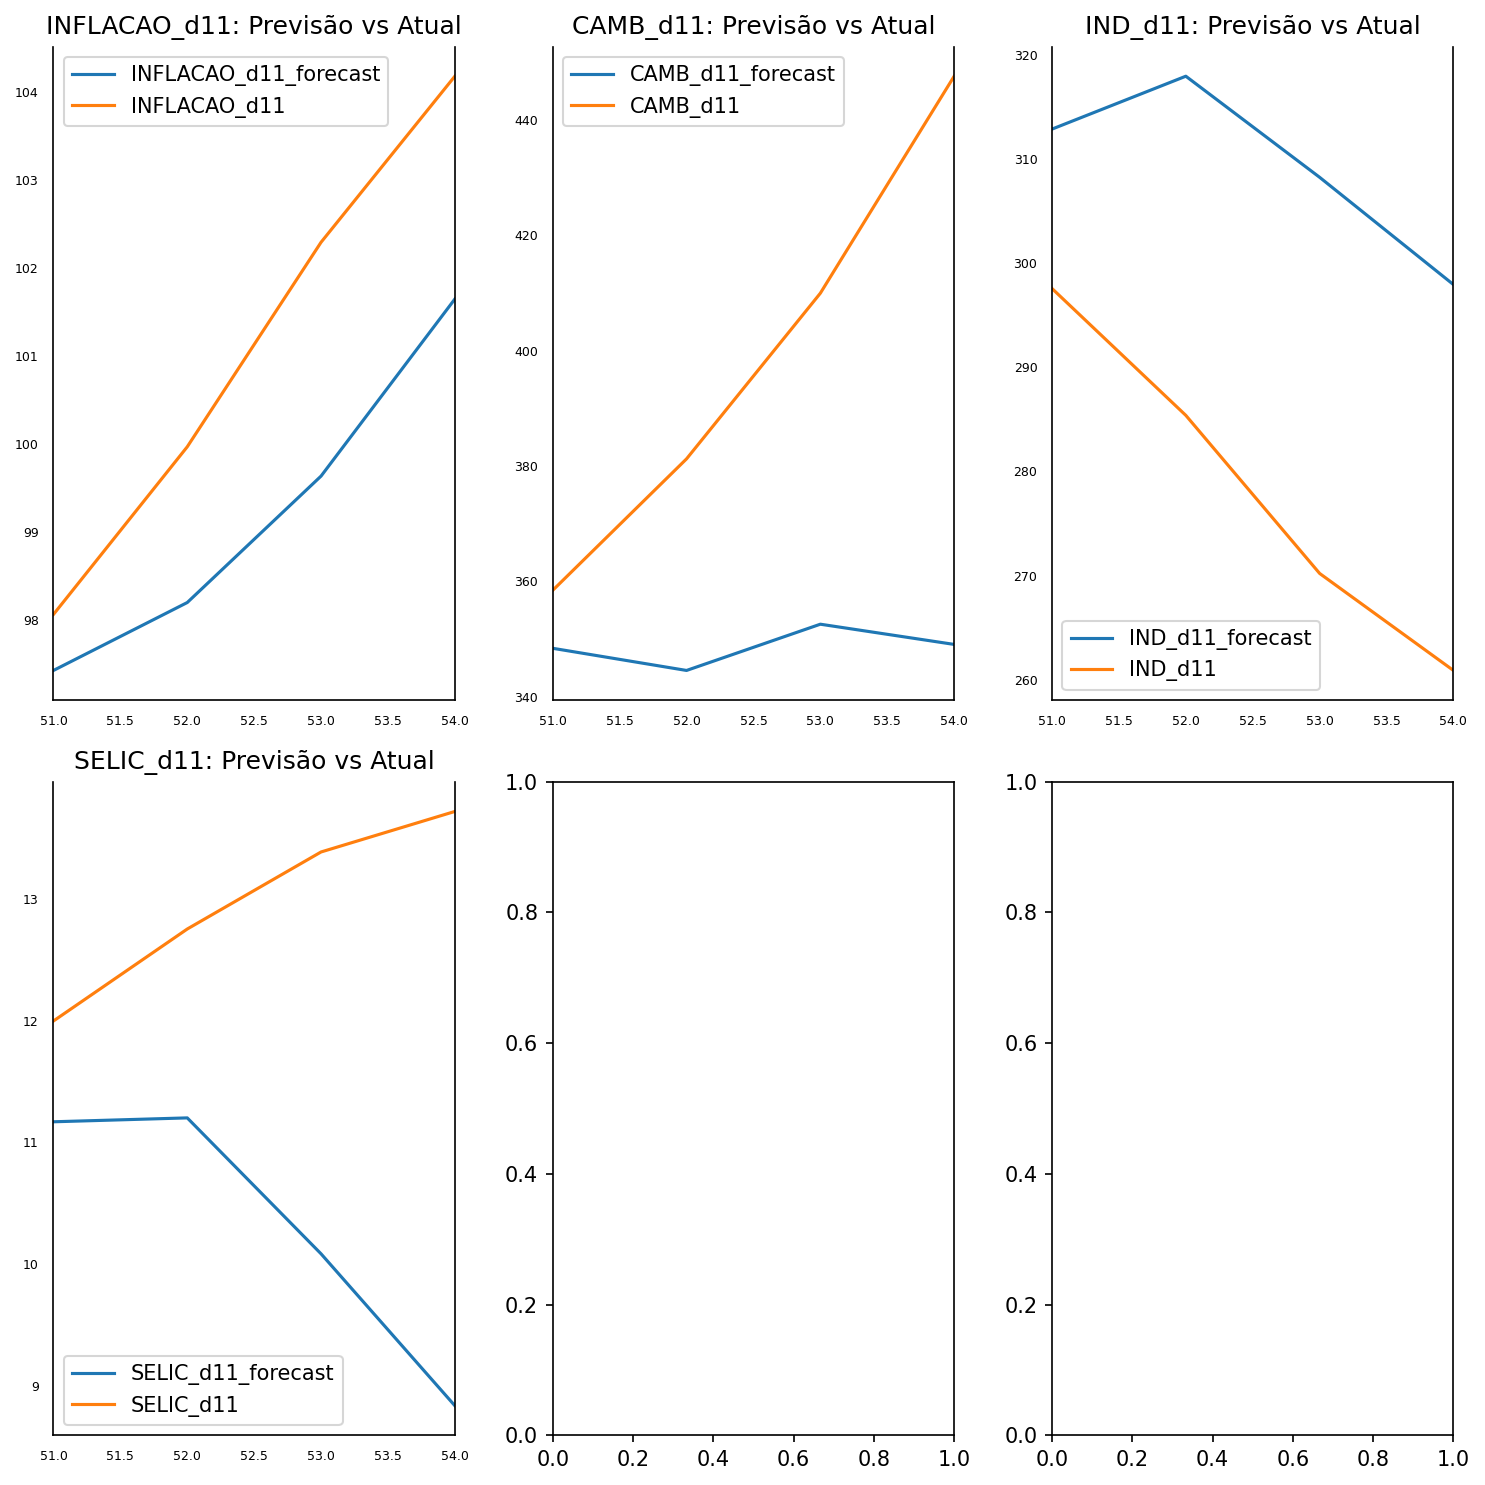

In [169]:
fig, axes = plt.subplots(nrows=int(len(df1.columns)/2), ncols=3, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df1.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df1_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Previsão vs Atual")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [170]:
#Diagnosticando as previsões

In [171]:
df1_test

,INFLACAO_d11,CAMB_d11,IND_d11,SELIC_d11
51,98.068768,358.429990,297.548997,11.996548
52,99.973028,381.215791,285.374536,12.752032
53,102.296315,409.933981,270.203886,13.384956
54,104.182356,447.549957,260.892070,13.717654


In [172]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: INFLACAO_d11')
accuracy_prod = forecast_accuracy(df_results['INFLACAO_d11_forecast'].values, df1_test['INFLACAO_d11'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: CAMB_d11')
accuracy_prod = forecast_accuracy(df_results['CAMB_d11_forecast'].values, df1_test['CAMB_d11'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: IND_d11')
accuracy_prod = forecast_accuracy(df_results['IND_d11_forecast'].values, df1_test['IND_d11'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))


Forecast Accuracy of: INFLACAO_d11
mape   :  0.0186
me     :  -1.8981
mae    :  1.8981
mpe    :  -0.0186
rmse   :  2.0612
corr   :  0.9802
minmax :  0.0186

Forecast Accuracy of: CAMB_d11
mape   :  0.1211
me     :  -50.6539
mae    :  50.6539
mpe    :  -0.1211
rmse   :  60.0864
corr   :  0.3859
minmax :  0.1211

Forecast Accuracy of: IND_d11
mape   :  0.112
me     :  30.7284
mae    :  30.7284
mpe    :  0.112
rmse   :  32.0592
corr   :  0.8114
minmax :  0.0997


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':


In [51]:
#Agora, partiremos para outro método de previsão, random forest

In [173]:
pre_scale = df1[['INFLACAO_d11', 'CAMB_d11', 'SELIC_d11']]

In [174]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(pre_scale)

In [175]:
scaled_X

array([[-1.95643993e+00,  7.42448196e-01,  2.09367859e+00],
       [-1.84770638e+00,  1.19443611e+00,  2.03294960e+00],
       [-1.68930549e+00,  2.33923939e+00,  1.73414903e+00],
       [-1.38525666e+00,  2.97236821e+00,  2.57843408e+00],
       [-1.23764642e+00,  2.42418850e+00,  2.41346197e+00],
       [-1.20853127e+00,  1.56646563e+00,  2.39787412e+00],
       [-1.17059252e+00,  1.34359628e+00,  1.43353510e+00],
       [-1.14711886e+00,  1.27834343e+00,  8.79974811e-01],
       [-1.08499705e+00,  1.38308291e+00,  6.97615835e-01],
       [-9.31865104e-01,  1.67095424e+00,  5.85408866e-01],
       [-8.22223779e-01,  1.42198301e+00,  5.62125647e-01],
       [-7.76486920e-01,  1.13154570e+00,  7.57256932e-01],
       [-7.36783022e-01,  9.09850218e-01,  8.71027714e-01],
       [-7.08690393e-01,  5.21781937e-01,  9.45817719e-01],
       [-7.52636993e-01,  2.15919958e-01,  9.57074478e-01],
       [-7.37005815e-01, -2.79964286e-02,  7.41960984e-01],
       [-7.18397275e-01, -1.27050424e-01

In [176]:
df1.columns

Index(['INFLACAO_d11', 'CAMB_d11', 'IND_d11', 'SELIC_d11'], dtype='object')

In [177]:
X = scaled_X

In [178]:
y = df1['IND_d11']

In [68]:
!pip install scikit-plot

In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [180]:
X_train

array([[ 0.82867976, -0.69447565, -0.93866883],
       [ 1.0088584 , -0.6724567 , -1.05517246],
       [ 0.43439837, -1.10048776, -0.65085887],
       [ 1.53637151, -0.37507737, -0.76820048],
       [-0.68245262, -0.02638886,  0.32868544],
       [-1.14711886,  1.27834343,  0.87997481],
       [ 1.64643542, -0.13595546, -0.70741578],
       [-0.06915575, -0.74395484, -0.3172411 ],
       [ 1.23399528, -0.35517967, -0.95159217],
       [-0.60664102, -0.07872004,  0.00550686],
       [-0.55080628, -0.32371502, -0.16290347],
       [-0.70869039,  0.52178194,  0.94581772],
       [-1.84770638,  1.19443611,  2.0329496 ],
       [-1.23764642,  2.4241885 ,  2.41346197],
       [-0.73678302,  0.90985022,  0.87102771],
       [ 0.0394351 , -0.03150148, -0.22257683],
       [ 1.08946686, -0.79036012, -1.08493976],
       [-0.4477324 , -0.41943045, -0.32092608],
       [-0.00715787, -0.38717528, -0.68163653],
       [-0.9318651 ,  1.67095424,  0.58540887],
       [-0.71839727, -0.12705042,  0.505

In [181]:
from sklearn.ensemble import RandomForestRegressor

In [182]:

import scikitplot as skplt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from numpy import argmax
import numpy as np

def build_and_test(X_tr, X_te, y_tr, y_te, class_weight=None, threshold=False):
    
    # Construindo PCA
    pca = PCA(n_components=2)
    pca.fit(X_tr.tolist())
    X_pca = pca.transform(X_tr.tolist())

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_tr, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
    plt.show()
    
    # Construindo Modelo
    if class_weight:
        model = RandomForestRegressor(class_weight = class_weight , criterion='squared_error')
    else:
        model = RandomForestRegressor(criterion='squared_error')
    model.fit(X_tr, y_tr)
    
    # Teste do modelo
    y_pred = model.predict(X_te)
    print('Resultado da prescisão %s' % precision_score(y_te, y_pred))
    print('Resultado do recall %s' % recall_score(y_te, y_pred))
    print('Resultado F1 %s' % f1_score(y_te, y_pred))
    print('Resultado acurácia %s' % accuracy_score(y_te, y_pred))
    
    y_score = model.predict_proba(X_te)
    fpr0, tpr0, thresholds = roc_curve(y_te, y_score[:, 1])
    roc_auc0 = auc(fpr0, tpr0)
    cm1 = confusion_matrix(y_test, y_pred)
    total1 = sum(sum(cm1))
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    print('Sensibilidade:  %s' % sensi)
    print('Especificação:  %s' % speci)
    
    # Print
    print(clf.score(X_test, y_test))
    return roc_auc0,fpr0,tpr0, best_threshold

In [183]:
feature_list = list(df1[['INFLACAO_d11', 'CAMB_d11']])

In [184]:
df1.columns

Index(['INFLACAO_d11', 'CAMB_d11', 'IND_d11', 'SELIC_d11'], dtype='object')

In [185]:
def build_and_test(X_tr, X_te, y_tr, y_te, class_weight=None, threshold=False):
      # Construindo PCA
    pca = PCA(n_components=2)
    pca.fit(X_tr.tolist())
    X_pca = pca.transform(X_tr.tolist())

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_tr, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
    plt.show()
        # Construindo Modelo
    if class_weight:
        model = RandomForestRegressor(class_weight = class_weight , criterion='squared_error')
    else:
        model = RandomForestRegressor(criterion='squared_error')
    model.fit(X_tr, y_tr)

    #Teste do modelo
    y_pred = model.predict(X_te)
    errors = abs(y_pred - y_test)
    MAE = print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.') #MAE (Mean Absolute Error)
    score = print('Score or Rsquared:', model.score(X_test, y_test)) #R quadrado
    mape = 100 * (errors / y_test)
    accuracy = 100 - np.mean(mape)
    acuracia = print('Accuracy:', round(accuracy, 2), '%.')

    return MAE, score, acuracia

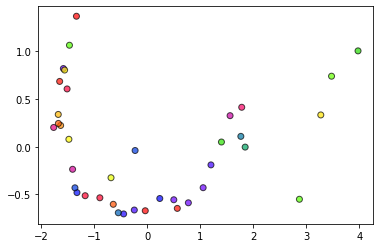

Mean Absolute Error: 15.44 degrees.
Score or Rsquared: 0.9335441669214267
Accuracy: 96.19 %.


In [186]:
#Um PCA para visualização dos dados
MAE, score, acuracia  = build_and_test(X_train, X_test, y_train, y_test)